In [128]:
import pandas as pd
from pathlib import Path
import json
import os
import numpy as np
import requests
from dotenv import load_dotenv
import pathlib as path

# #Matt's original merge code:

# # path to read raw csv data from
# bea_path = Path('C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/01_MergedData/data/top_counties.csv')

# #C:/Users/Daniel Quinn/Desktop\Bootcamp\Working_Copy_Project_1\01_MergedData\county_select_change.csv

# census_path = Path('C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/Census/7-17-24 Work/2010_2022_County_Pop_Totals.csv')
# weather_path = Path('C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/Weather/ranked_disasters_by_year_county.csv')
# zillow_path = Path('C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/Zillow/home_value_CAGR.csv')

# # path to save cleaned data to 
# save_path = Path('./01_MergedData/data/top_counties.csv')

# csv to pandas df
# bea_df = pd.read_csv(bea_path)
# census_df = pd.read_csv(census_path)
# weather_df = pd.read_csv(weather_path)
# zillow_df = pd.read_csv(zillow_path)

# census_df = census_df[['GeoFips', 'Total Growth Rate']]
# census_df['Total Growth Rate'] = census_df['Total Growth Rate'] * 100
# census_df = census_df.sort_values('Total Growth Rate', ascending=False)
# census_df = census_df[:300]


# bea_df = bea_df.sort_values('2022', ascending=False)[:300]
# zillow_df = zillow_df.sort_values('CAGR', ascending=False)[:300]


# weather_df = weather_df.rename(columns={'county_fips':'GeoFips'})

# zillow_df = zillow_df.rename(columns={'County_State':'GeoName'})
# bea_df['GeoName'] = bea_df['GeoName'].apply(lambda x: x.replace('*', '') if '*' in x else x)


# zillow_df['GeoName'] = zillow_df['GeoName'].apply(lambda x: x.replace(' County', '') if ' County' in x else x)


# print(census_df.columns)

# county_zillow = pd.merge(bea_df, zillow_df, on='GeoName').dropna()

# print(census_df.head())

# merged_df = pd.merge(county_zillow, census_df, on='GeoFips')
merged_df2 = pd.read_csv('C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/01_MergedData/data/top_counties.csv')
merged_df2.sort_values("Total Growth Rate", ascending = False)

,Unnamed: 0,GeoFips,GeoName,Income Change,CAGR,Total Growth Rate
10,10,49053,"Washington County, Utah",0.935540,8.204727,42.779756
22,22,47187,"Williamson County, Tennessee",0.810069,7.320579,41.720325
1,1,30031,"Gallatin County, Montana",1.126722,7.792158,39.259185
6,6,5007,"Benton County, Arkansas",1.010989,6.678546,35.877592
4,4,49049,"Utah County, Utah",1.048108,6.837103,35.070734
17,17,16027,"Canyon County, Idaho",0.827298,9.421869,32.538484
13,13,16055,"Kootenai County, Idaho",0.872608,8.098045,32.164635
21,21,12035,"Flagler County, Florida",0.811683,6.634026,32.083438
3,3,41017,"Deschutes County, Oregon",1.056533,8.269753,30.814977
12,12,48453,"Travis County, Texas",0.900560,6.570435,28.679499


In [129]:
#DFQ Initial Sort:

import prophet
import matplotlib
merged_df3 = merged_df2

#pd.read_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Working_Copy_Project_1/merged_df2.csv")
initial_df = pd.DataFrame(merged_df3)
initial_df2 = initial_df
del initial_df2["Unnamed: 0"]
#del initial_df2["GeoFips"]
initial_df23 = initial_df2.rename(columns = {"GeoName": "County"})
initial_df23

,GeoFips,County,Income Change,CAGR,Total Growth Rate
0,8031,"Denver County, Colorado",1.342352,6.732323,18.007194
1,30031,"Gallatin County, Montana",1.126722,7.792158,39.259185
2,12021,"Collier County, Florida",1.081409,6.919575,23.419708
3,41017,"Deschutes County, Oregon",1.056533,8.269753,30.814977
4,49049,"Utah County, Utah",1.048108,6.837103,35.070734
5,12085,"Martin County, Florida",1.012109,7.084390,10.665127
6,5007,"Benton County, Arkansas",1.010989,6.678546,35.877592
7,12099,"Palm Beach County, Florida",0.988132,7.468654,14.741113
8,12061,"Indian River County, Florida",0.985924,6.921889,21.034513
9,8013,"Boulder County, Colorado",0.957125,6.441268,10.943672


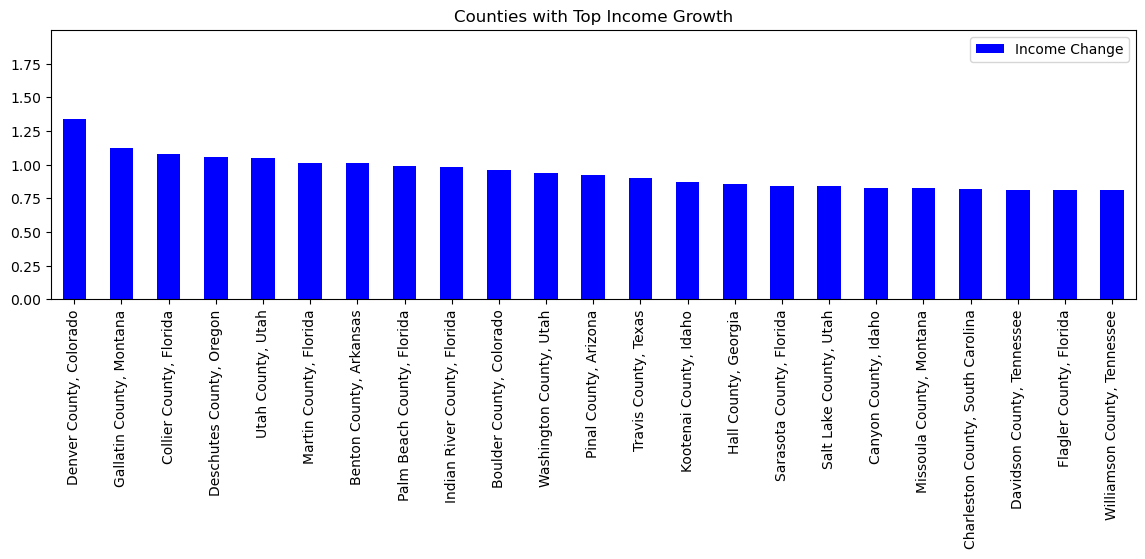

In [130]:
#Graphing income growth only:

income_growth = initial_df23.groupby('County').mean()
top_20_income = income_growth.sort_values(by='Income Change', ascending=False)

income_all_chart = top_20_income.plot.bar(y="Income Change", rot=90, width=.5, figsize=(14,3.5), ylim=(0,2),
                         title="Counties with Top Income Growth",
                         yticks=[0,.25,.5,.75,1,1.25,1.5,1.75], xlabel='', color='blue')

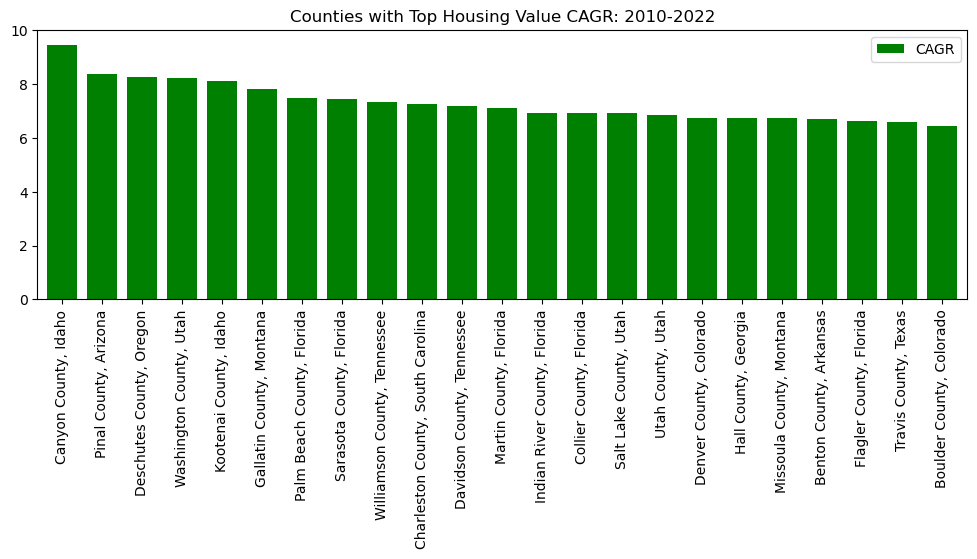

In [131]:
#Graphing housing growth only:

housing_growth = initial_df2.groupby('GeoName').mean()
top_20_housing = housing_growth.sort_values(by='CAGR', ascending=False)

housing_all_chart = top_20_housing.plot.bar(y="CAGR", rot=90, width=.75, figsize=(12,3.5), ylim=(0,10),
                         title="Counties with Top Housing Value CAGR: 2010-2022",
                         yticks=[0,2,4,6,8,10], xlabel='', color='green')

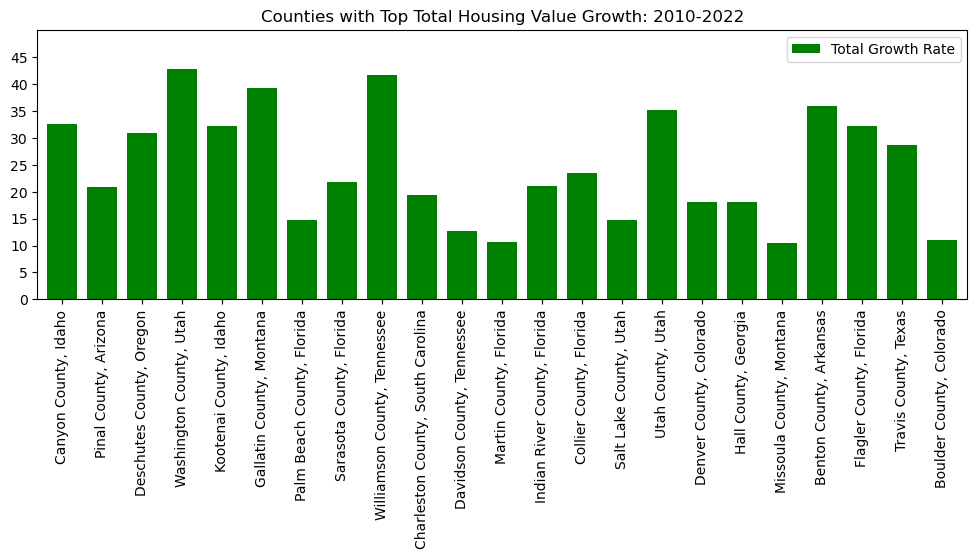

In [132]:
#Graphing population growth only:

pop_growth = initial_df2.groupby('GeoName').mean()
top_20_pop = housing_growth.sort_values(by='Total Growth Rate', ascending=True)

housing_all_chart = top_20_housing.plot.bar(y="Total Growth Rate", rot=90, width=.75, figsize=(12,3.5), ylim=(0,50),
                         title="Counties with Top Total Housing Value Growth: 2010-2022",
                         yticks=[0,5,10,15,20,25,30,35,40,45], xlabel='', color='green'),

In [133]:
#Initial set up for the poverty df
poverty=pd.read_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/7-18-CSVs/combined_poverty_2022.csv")
poverty_df=pd.DataFrame(poverty)
del poverty_df["Unnamed: 0"]
filtered_poverty_df = poverty_df[~poverty_df["County"].str.contains("Puerto Rico")]
filtered_poverty_df.sort_values("2022 Poverty Rate", ascending=True)
filtered_poverty_df.to_csv('C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/filtered_povery_final.csv')

In [134]:
final_afford=pd.read_csv('C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/filtered_povery_final.csv')
final_afford_df=pd.DataFrame(final_afford)
#final_afford_df2 = initial_df23.merge(final_afford_df, on="County")
#del final_afford_df2["Unnamed: 0"]
final_afford_df

,Unnamed: 0,County,Total Population,Est. Pop Below Poverty Level,2022 Poverty Rate,GEO_ID
0,0,United States,325521470,40951625,12.580315,0100000US
1,1,"Baldwin County, Alabama",241525,32313,13.378739,0500000US01003
2,2,"Calhoun County, Alabama",111451,20450,18.348871,0500000US01015
3,3,"Cullman County, Alabama",89595,16019,17.879346,0500000US01043
4,4,"DeKalb County, Alabama",70267,13967,19.877040,0500000US01049
...,...,...,...,...,...,...
833,833,"Waukesha County, Wisconsin",407085,21311,5.235025,0500000US55133
834,834,"Winnebago County, Wisconsin",163930,19676,12.002684,0500000US55139
835,835,"Wood County, Wisconsin",73277,8420,11.490645,0500000US55141
836,836,"Laramie County, Wyoming",99106,10605,10.700664,0500000US56021


In [135]:
#Initial set up for the housing affordability df
housing=pd.read_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/7-18-CSVs/housing_affordability_2022.csv")
housing_df=pd.DataFrame(housing)
del housing_df["Unnamed: 0"]
filtered_housing_df = housing_df[~poverty_df["County"].str.contains("Puerto Rico")]
filtered_housing_df.sort_values("County", ascending=True)
filtered_housing_df.to_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/7-18-CSVs/filtered_housing_2022.csv")
filtered_housing_df.sort_values("County", ascending=True)

C:\Users\Daniel Quinn\AppData\Local\Temp\ipykernel_30604\718854180.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_housing_df = housing_df[~poverty_df["County"].str.contains("Puerto Rico")]


,County,Total Owner-Occupied Units,Mort=Y,Mort=N,Mort/Income <10%,Mort/Income 10-14.9%,Mort/Income 15-19.9%,Mort/Income 20-24.9%,Mort/Income 25-29.9%,Mort/Income 30-34.9%,Mort/Income 35-39.9%,Mort/Income 40-49.9%,Mort/Income >=50%,GEO_ID
195,"Ada County, Idaho",144331,99035,12378,18675,20219,15356,8685,5983,4629,4202,8604,304,0500000US16001
86,"Adams County, Colorado",134864,97042,4728,16321,18315,14234,11897,8620,4904,7541,10482,0,0500000US08001
602,"Adams County, Pennsylvania",31086,18639,1718,3410,4037,2905,1988,1075,702,1146,1574,84,0500000US42001
645,"Aiken County, South Carolina",55033,30227,3950,7405,4998,4607,2307,1533,552,1598,3224,53,0500000US45003
111,"Alachua County, Florida",62968,37339,2630,7537,9136,3835,3383,2686,1269,2814,3993,56,0500000US12001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,"York County, Pennsylvania",139723,88881,9009,17429,18335,12514,8925,7377,3848,3568,7382,494,0500000US42133
665,"York County, South Carolina",84255,58090,7988,13023,11510,8525,5594,2895,1334,2889,4332,0,0500000US45091
771,"York County, Virginia",20959,15480,1724,3526,2907,2585,2635,897,248,402,495,61,0500000US51199
85,"Yuba County, California",19487,13528,507,1242,2922,2169,912,1085,621,1616,2319,135,0500000US06115


In [136]:
national_housing_affordability = pd.read_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/7-18-CSVs/national_housing_affordability.csv")
national_housing_df = pd.DataFrame(national_housing_affordability)
national_housing_df

national_housing_df['Affordability: High'] = (national_housing_df['Mort/Income <10%'] +
                                           national_housing_df['Mort/Income 10-14.9%'] +
                                           national_housing_df['Mort/Income 15-19.9%']) / national_housing_df['Mort=Y'] * 100

national_housing_df['Affordability: Mid'] = (national_housing_df['Mort/Income 20-24.9%'] +
                                           national_housing_df['Mort/Income 25-29.9%'] +
                                           national_housing_df['Mort/Income 30-34.9%']) / national_housing_df['Mort=Y'] * 100

national_housing_df['Affordability: Low'] = (national_housing_df['Mort/Income 40-49.9%'] +
                                           national_housing_df['Mort/Income >=50%']) / national_housing_df['Mort=Y'] * 100
national_housing_df2 = national_housing_df[['County', 'Mort=Y', 'Mort/Income <10%', 'Mort/Income 10-14.9%', 'Mort/Income 15-19.9%',
                                            'Mort/Income 20-24.9%', 'Mort/Income 25-29.9%', 'Mort/Income 30-34.9%',
                                            'Mort/Income 35-39.9%', 'Mort/Income 40-49.9%', 'Mort/Income >=50%', 'Affordability: High',
                                            'Affordability: Mid', 'Affordability: Low']]
national_housing_df2
#project_housing_afford_df = filtered_housing_df.merge(national_housing_df, on="County")
#project_housing_afford_df

,County,Mort=Y,Mort/Income <10%,Mort/Income 10-14.9%,Mort/Income 15-19.9%,Mort/Income 20-24.9%,Mort/Income 25-29.9%,Mort/Income 30-34.9%,Mort/Income 35-39.9%,Mort/Income 40-49.9%,Mort/Income >=50%,Affordability: High,Affordability: Mid,Affordability: Low
0,United States,51394498,9395208,10094364,7582641,5087322,3371934,2293489,2766071,5853990,268782,52.675314,20.921977,11.913283


In [137]:
filtered_housing = pd.read_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/7-18-CSVs/filtered_housing_2022.csv")
filtered_df = pd.DataFrame(filtered_housing)
initial_df23['County'] = initial_df23['County'].astype(str)
filtered_housing_df['County'] = filtered_housing_df['County'].astype(str)

# Merge the DataFrames on the 'County' column
final_afford_df = initial_df23.merge(filtered_housing_df, on="County")
final_afford_df
final_afford_dfh = final_afford_df[['County', 'Mort=Y', 'Mort/Income <10%', 'Mort/Income 10-14.9%', 'Mort/Income 15-19.9%',
                                    'Mort/Income 20-24.9%', 'Mort/Income 25-29.9%', 'Mort/Income 30-34.9%',
                                    'Mort/Income 35-39.9%','Mort/Income 40-49.9%', 'Mort/Income >=50%']]

# Calculate percentages
final_afford_dfh['Affordability: High'] = (final_afford_dfh['Mort/Income <10%'] +
                                           final_afford_dfh['Mort/Income 10-14.9%'] +
                                           final_afford_dfh['Mort/Income 15-19.9%']) / final_afford_dfh['Mort=Y'] * 100

final_afford_dfh['Affordability: Mid'] = (final_afford_dfh['Mort/Income 20-24.9%'] +
                                            final_afford_dfh['Mort/Income 25-29.9%'] +
                                            final_afford_dfh['Mort/Income 30-34.9%']) / final_afford_dfh['Mort=Y'] * 100

final_afford_dfh['Affordability: Low'] = (final_afford_dfh['Mort/Income 40-49.9%'] +
                                           final_afford_dfh['Mort/Income >=50%']) / final_afford_dfh['Mort=Y'] * 100
                 

final_afford_dfh


#final_afford_df = initial_df23.merge(filtered_df)
#final_afford_df

#final_afford_df = filtered_housing_df.merge(renam_initial_df2, on="County")
#final_afford_df

C:\Users\Daniel Quinn\AppData\Local\Temp\ipykernel_30604\1024227791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_housing_df['County'] = filtered_housing_df['County'].astype(str)
C:\Users\Daniel Quinn\AppData\Local\Temp\ipykernel_30604\1024227791.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_afford_dfh['Affordability: High'] = (final_afford_dfh['Mort/Income <10%'] +
C:\Users\Daniel Quinn\AppData\Local\Temp\ipykernel_30604\1024227791.py:18: SettingWithCopyWarning: 
A value is tryi

,County,Mort=Y,Mort/Income <10%,Mort/Income 10-14.9%,Mort/Income 15-19.9%,Mort/Income 20-24.9%,Mort/Income 25-29.9%,Mort/Income 30-34.9%,Mort/Income 35-39.9%,Mort/Income 40-49.9%,Mort/Income >=50%,Affordability: High,Affordability: Mid,Affordability: Low
0,"Denver County, Colorado",125626,20982,22616,19169,12202,8106,5983,7861,16732,859,49.963383,20.927993,14.002675
1,"Gallatin County, Montana",20347,2521,4539,2289,1943,2061,1234,1396,2601,0,45.947806,25.743353,12.783211
2,"Collier County, Florida",60383,7544,10743,8695,5439,4549,2824,3253,12553,269,44.684762,21.217892,21.234453
3,"Deschutes County, Oregon",39032,5472,8069,4137,3547,3450,2638,2911,5586,57,45.291043,24.684874,14.457368
4,"Utah County, Utah",101049,19599,22935,17137,11474,7285,4250,4392,6201,268,59.051549,22.770141,6.401845
5,"Martin County, Florida",26200,3584,4916,3044,2144,2053,1701,2108,3694,76,44.061069,22.511450,14.389313
6,"Benton County, Arkansas",53177,12747,14029,8005,4104,2226,1915,1353,3280,16,65.406097,15.504824,6.198168
7,"Palm Beach County, Florida",223456,26004,37874,28759,24968,18710,11905,14752,41175,1527,41.456484,24.874248,19.109802
8,"Indian River County, Florida",26045,5005,4393,3561,2567,1853,1455,822,3886,0,49.756191,22.557113,14.920330
9,"Boulder County, Colorado",55814,11857,10304,7084,5415,2954,3566,2945,6237,0,52.397248,21.383524,11.174616


In [138]:
#This is for the scatterplot graph for housing affordability:
 
co_afford_df = pd.concat([final_afford_dfh, national_housing_df2], ignore_index=True)
co_afford_df2 = co_afford_df[["County", "Affordability: High", "Affordability: Mid", "Affordability: Low"]]
co_afford_df2

,County,Affordability: High,Affordability: Mid,Affordability: Low
0,"Denver County, Colorado",49.963383,20.927993,14.002675
1,"Gallatin County, Montana",45.947806,25.743353,12.783211
2,"Collier County, Florida",44.684762,21.217892,21.234453
3,"Deschutes County, Oregon",45.291043,24.684874,14.457368
4,"Utah County, Utah",59.051549,22.770141,6.401845
5,"Martin County, Florida",44.061069,22.511450,14.389313
6,"Benton County, Arkansas",65.406097,15.504824,6.198168
7,"Palm Beach County, Florida",41.456484,24.874248,19.109802
8,"Indian River County, Florida",49.756191,22.557113,14.920330
9,"Boulder County, Colorado",52.397248,21.383524,11.174616


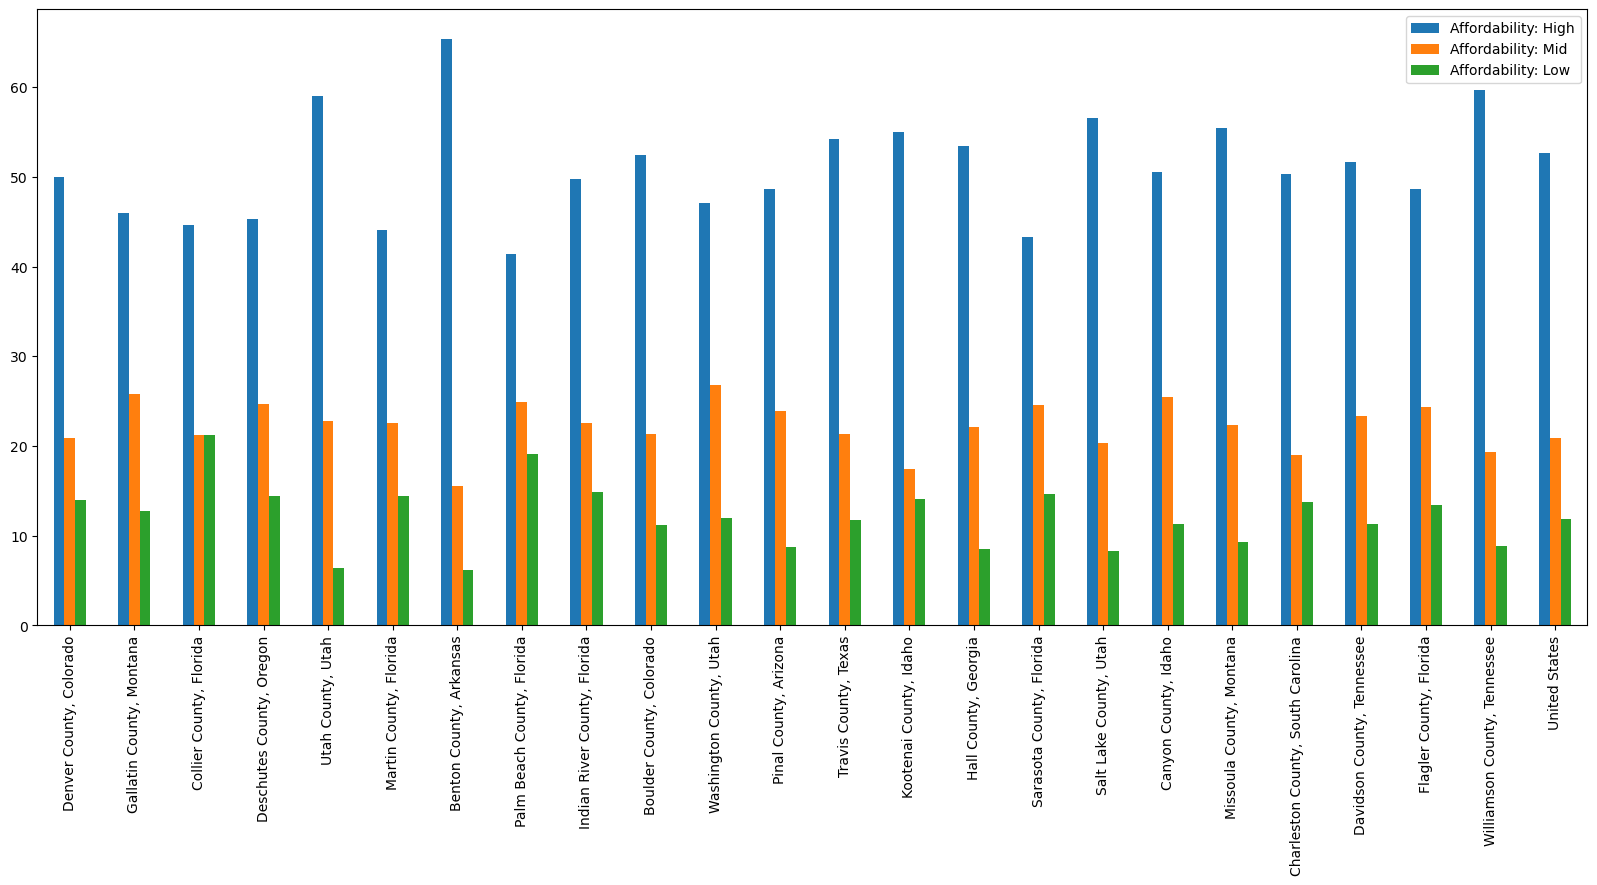

<Figure size 640x480 with 0 Axes>

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = co_afford_df2.plot(kind="bar", figsize=(20,8))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(co_afford_df2["County"], rotation=90)

plt.show()
plt.tight_layout()

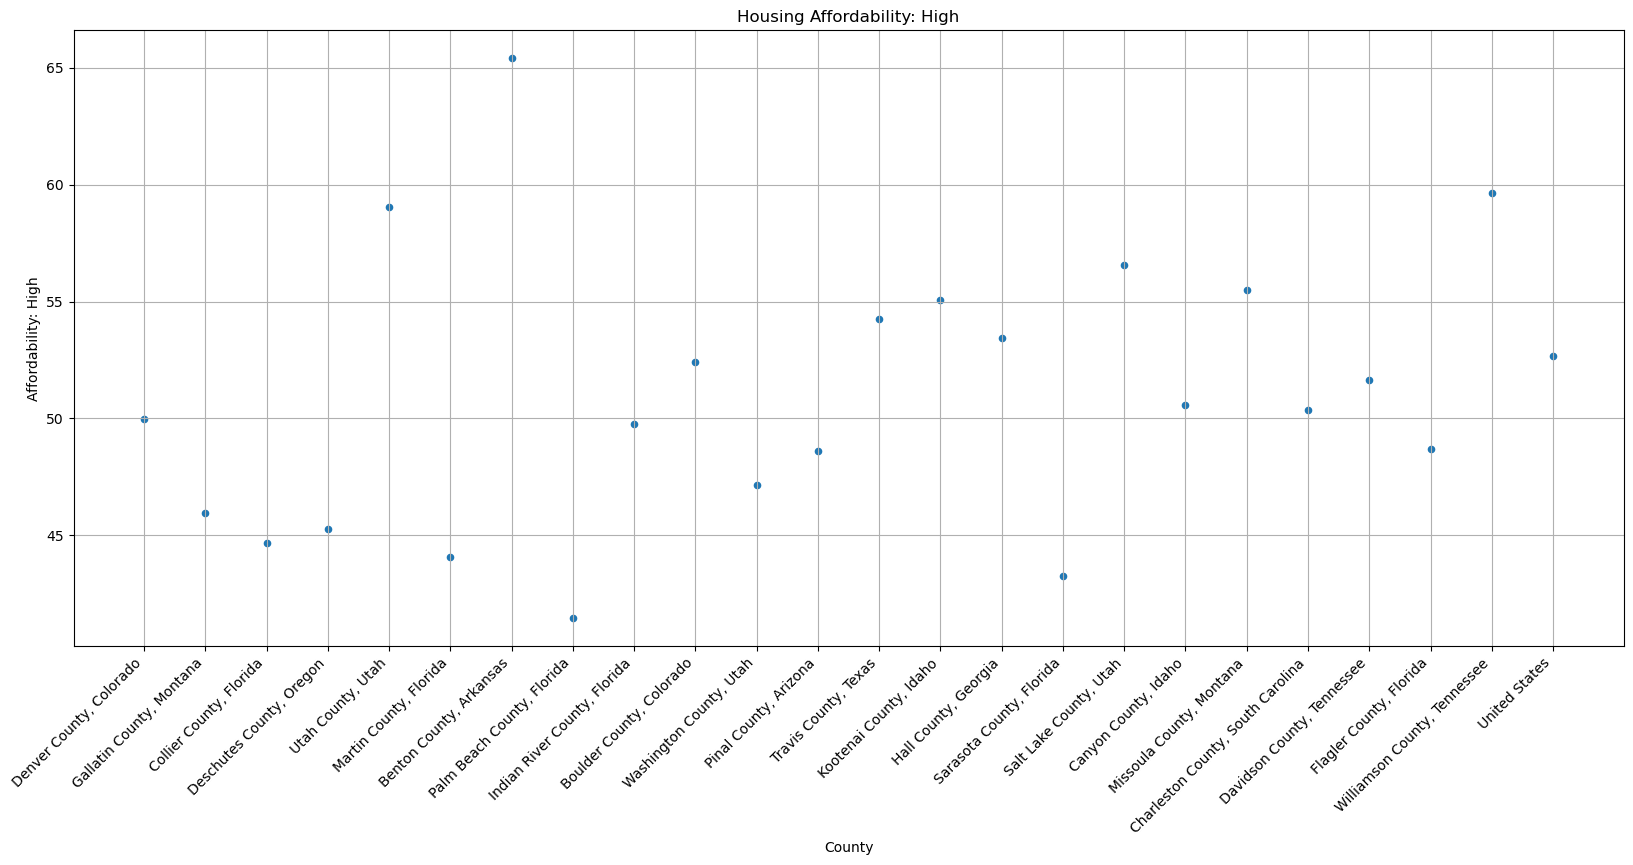

In [140]:
# Create a scatter plot which compares MPG to horsepower
# co_afford_df2.plot(kind="scatter", x="County", y="Affordability: High", grid=True, figsize=(40,8),
#               title="Housing Affordability: High")
# plt.show()

ax = co_afford_df2.plot(kind="scatter", x="County", y="Affordability: High", grid=True, figsize=(20,8),
                         title="Housing Affordability: High")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [141]:
co_afford_df2

,County,Affordability: High,Affordability: Mid,Affordability: Low
0,"Denver County, Colorado",49.963383,20.927993,14.002675
1,"Gallatin County, Montana",45.947806,25.743353,12.783211
2,"Collier County, Florida",44.684762,21.217892,21.234453
3,"Deschutes County, Oregon",45.291043,24.684874,14.457368
4,"Utah County, Utah",59.051549,22.770141,6.401845
5,"Martin County, Florida",44.061069,22.511450,14.389313
6,"Benton County, Arkansas",65.406097,15.504824,6.198168
7,"Palm Beach County, Florida",41.456484,24.874248,19.109802
8,"Indian River County, Florida",49.756191,22.557113,14.920330
9,"Boulder County, Colorado",52.397248,21.383524,11.174616


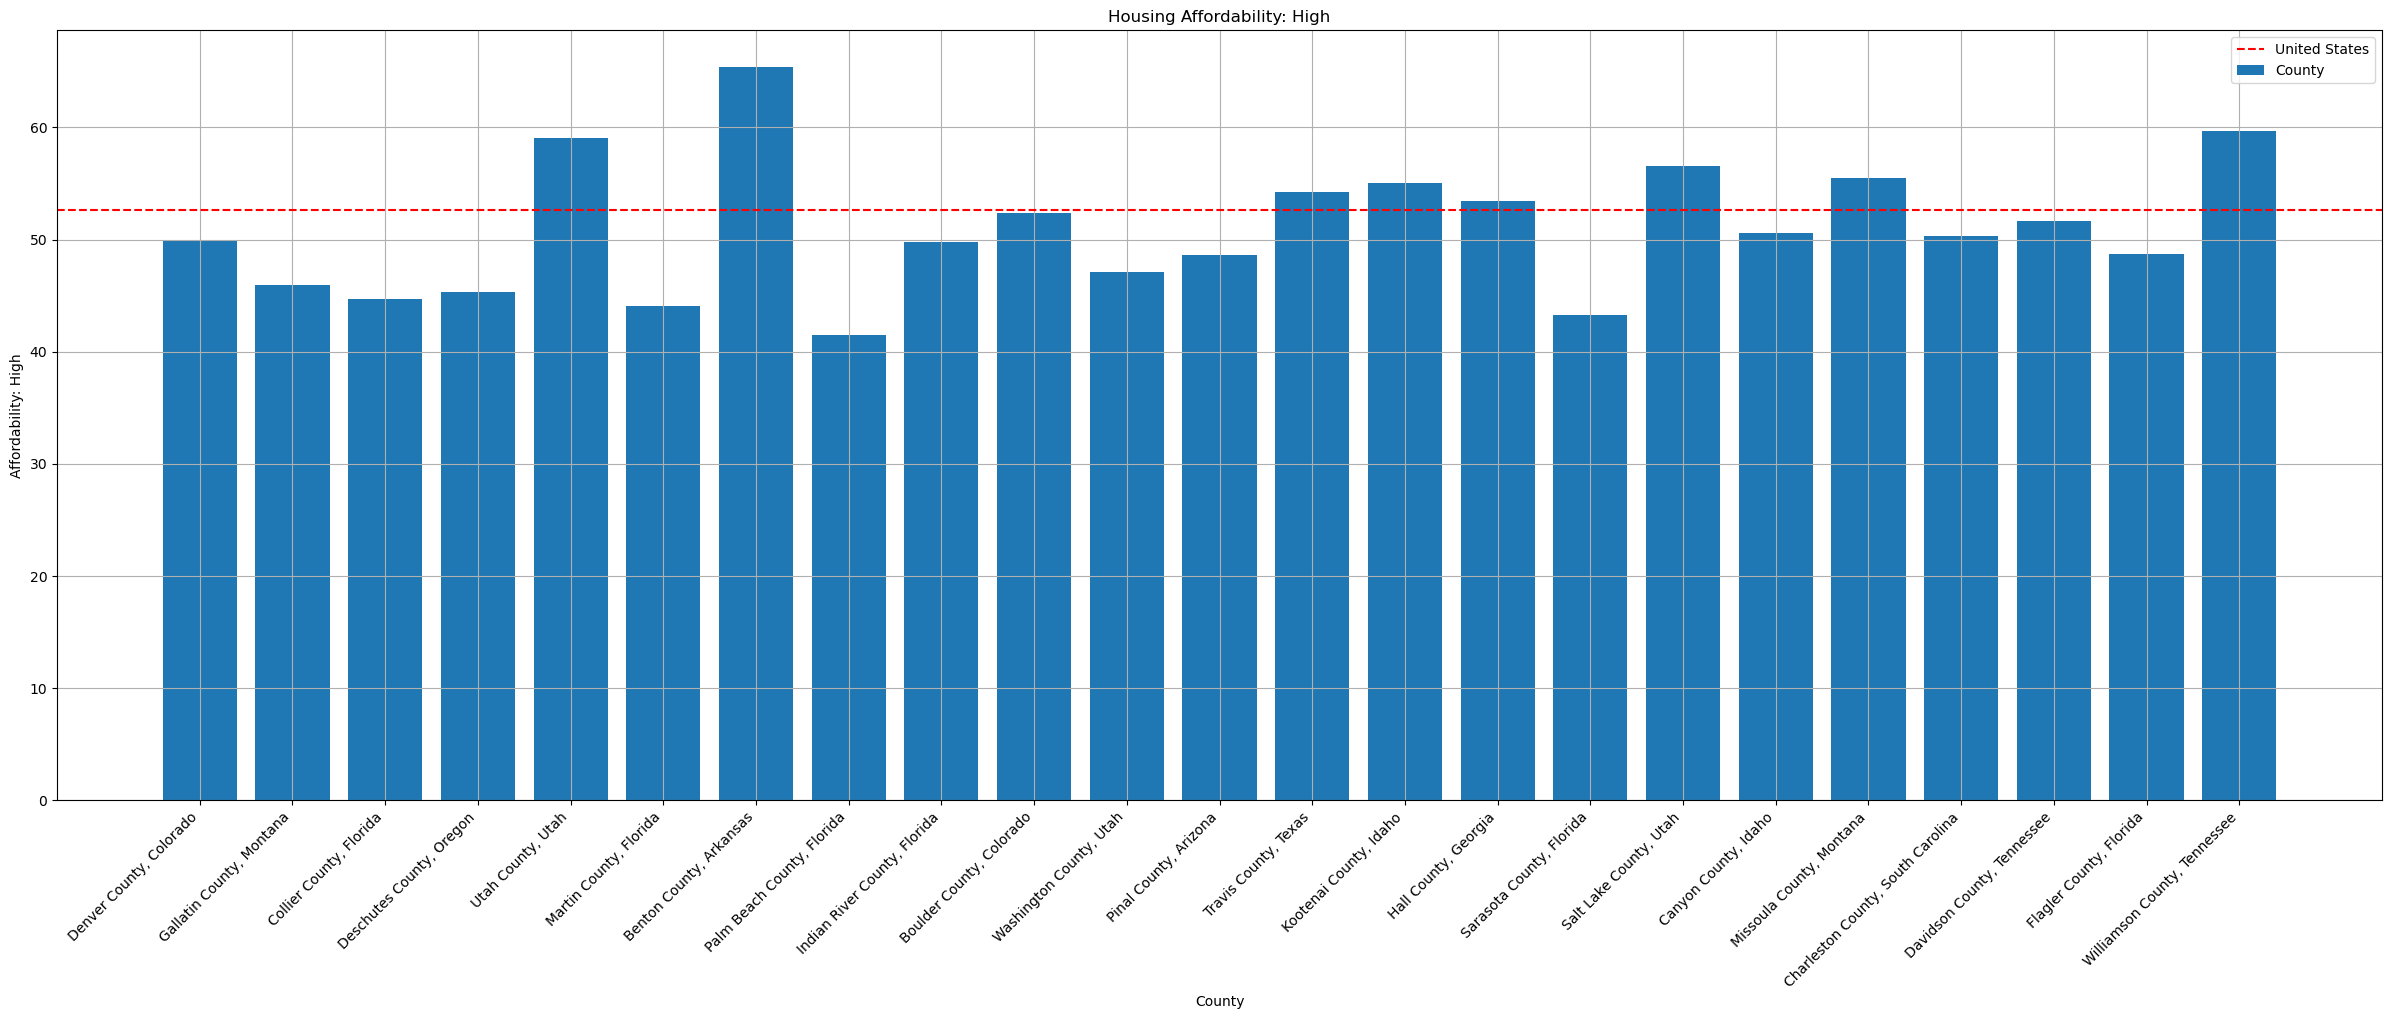

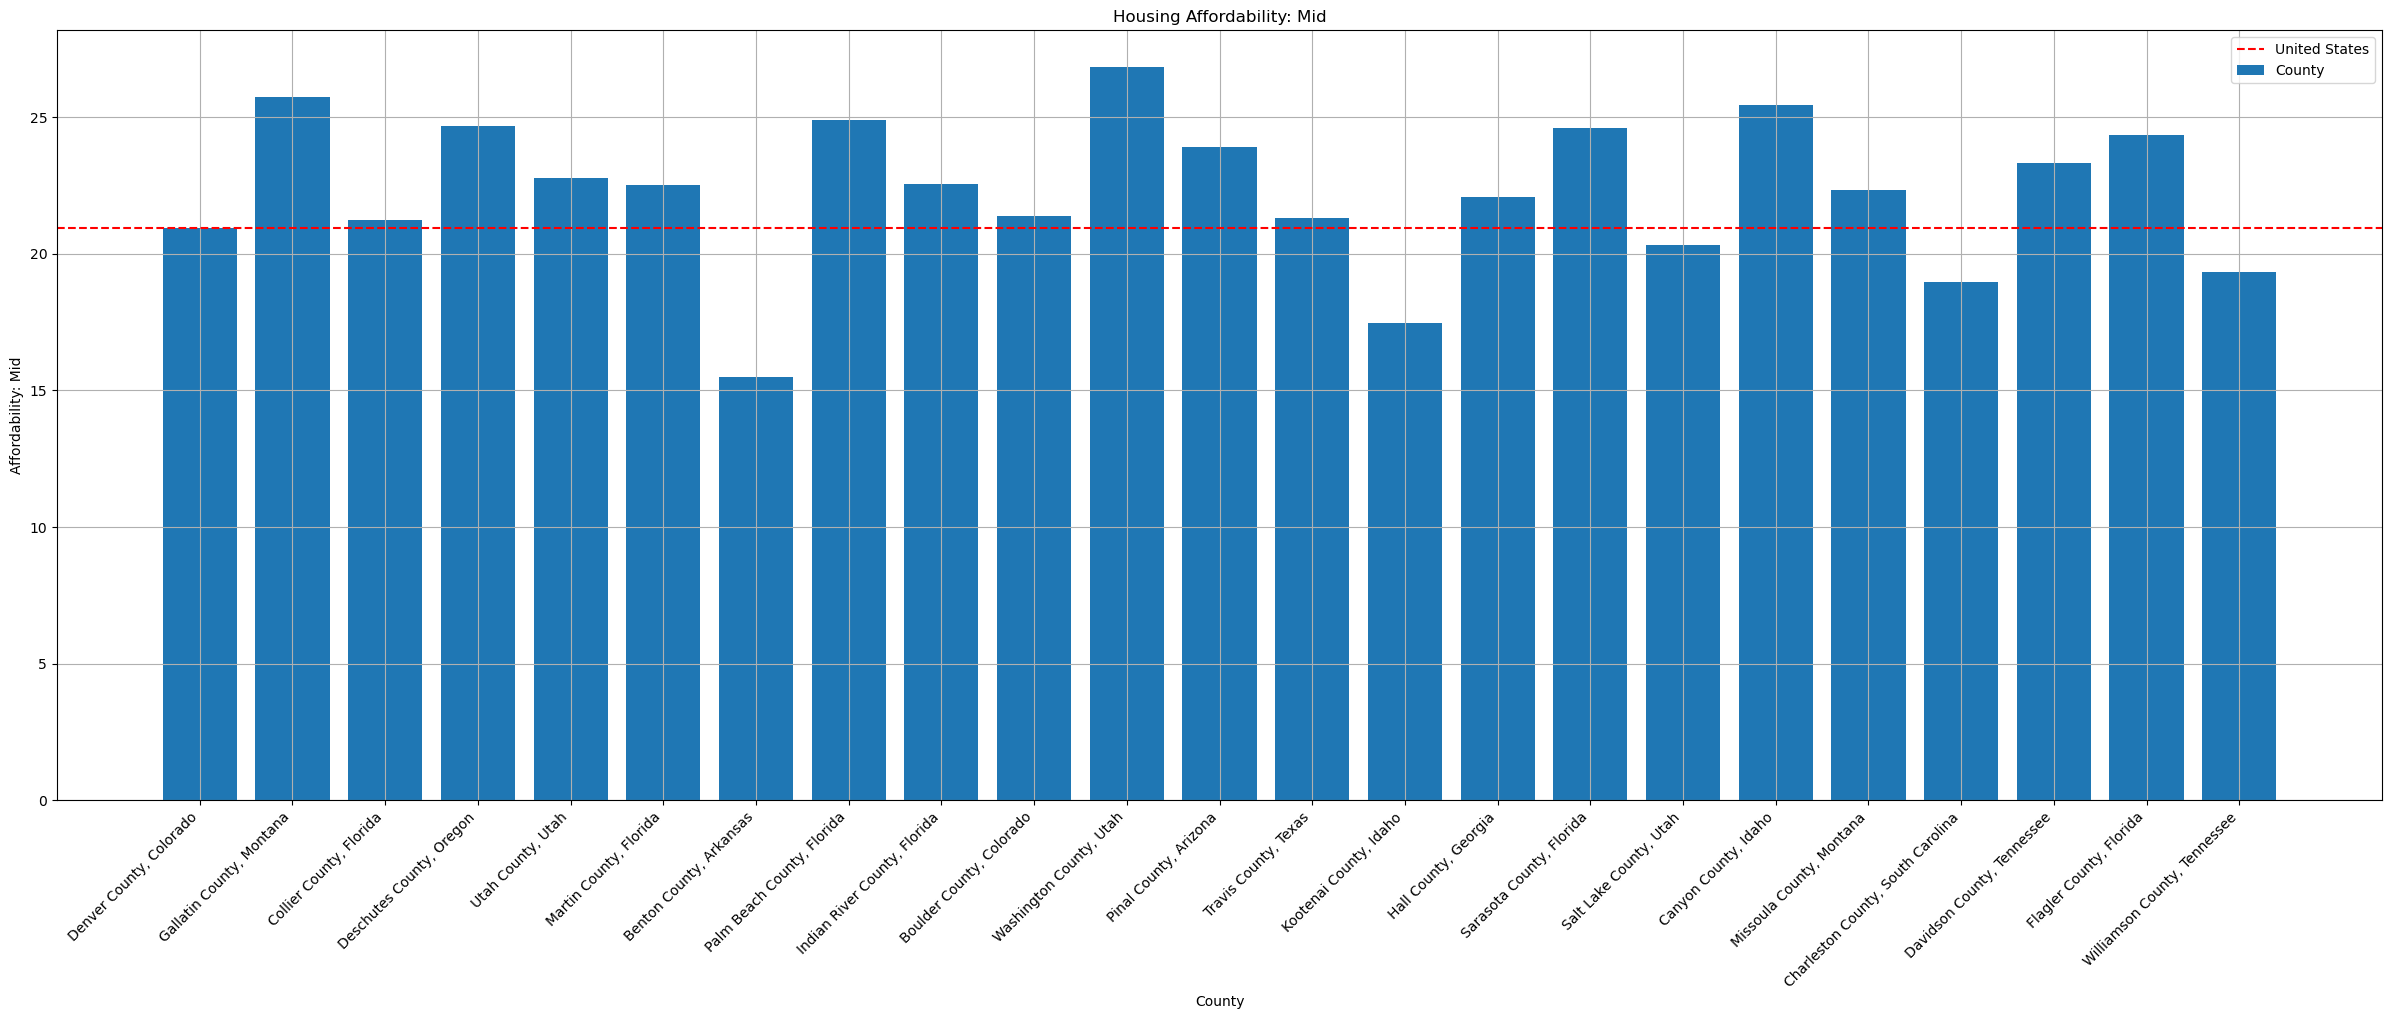

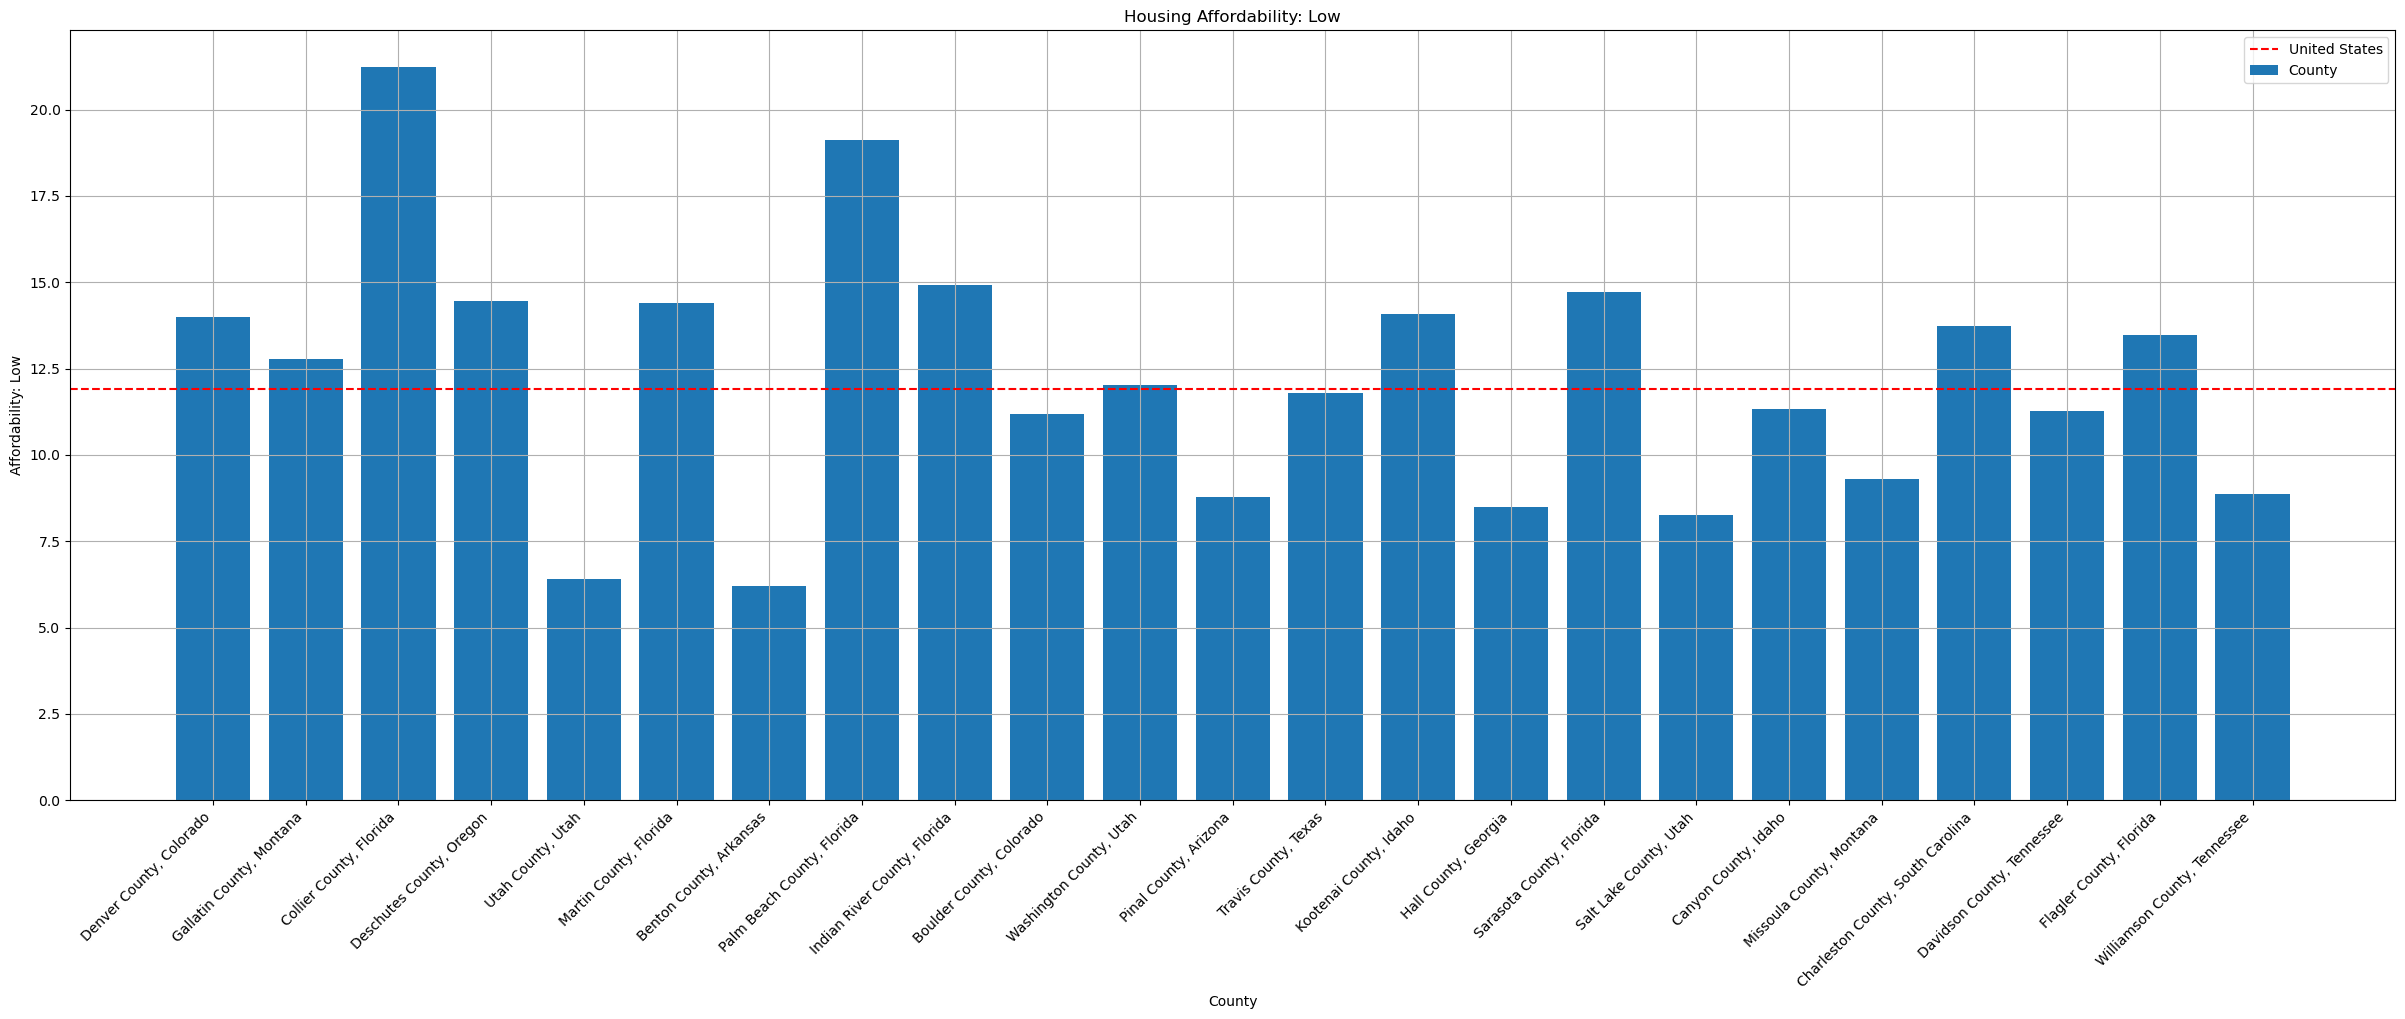

In [142]:
benchmark = co_afford_df2[co_afford_df2['County'] == 'United States']

# Remove the United States row from the original DataFrame
co_afford_df2 = co_afford_df2[co_afford_df2['County'] != 'United States']

# Define a function to plot each affordability category
def plot_affordability(co_afford_df2, benchmark, category, title):
    plt.figure(figsize=(30, 10))
    plt.bar(co_afford_df2['County'], co_afford_df2[category], label='County')
    plt.axhline(y=benchmark[category].values[0], color='r', linestyle='--', label='United States')
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('County')
    plt.ylabel(category)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each affordability category
plot_affordability(co_afford_df2, benchmark, 'Affordability: High', 'Housing Affordability: High')
plot_affordability(co_afford_df2, benchmark, 'Affordability: Mid', 'Housing Affordability: Mid')
plot_affordability(co_afford_df2, benchmark, 'Affordability: Low', 'Housing Affordability: Low')